In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels

In [2]:
%matplotlib inline

In [11]:
class AdalineEstimator(BaseEstimator,ClassifierMixin):
    def __init__(self,eta=.001,n_iterations =500,random_state=None):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.errors = []
        self.eta = eta
        self.w = []
        self.wAll = []
    def net_i(self,x):
        return np.dot(x,self.w)
    def activation(self,x):
        return self.net_i(x)
    def output(self,x):
        if self.activation(x)>=0.0:
            return 1
        else:
            return -1
    def fit(self,X=None,y=None):
        random_state = check_random_state(self.random_state)
        self.w = random_state.random_sample(np.size(X,1))
        X,y = check_X_y(X,y)
        self.X_ = X
        self.y_ = y
        for i in range(self.n_iterations):
            rand_index = random_state.randint(0,np.size(X,0))
            x_ =  X[rand_index]
            y_ = y[rand_index]
            s = np.dot(x_,self.w)
            error = (y_ - s)**2
            self.errors.append(error)
            self.w += self.eta * x_ * (y_-s)
            self.wAll.append(self.w.copy())
    def predict(self,x):
        check_is_fitted(self,['X_','y'])
        y_hat = self.output(x)
        return y_hat
    def plot(self):
        x1 = []
        x2 = []
        colors = []
        for i in range(self.X_.shape[0]):
            x1.append(self.X_[i][1])
            x2.append(self.X_[i][2])
            y = self.y_[i]
            if y == 1:
                colors.append('r') # rot
            else:
                colors.append('b') # blau
        # Raster
        plt.style.use('seaborn-whitegrid')
        plt.plot(self.errors)
        plt.figure(1)
        plt.show()
        plt.figure(2)
        plt.scatter(x1,x2,c=colors)
        x1Line = np.linspace(0.0,1.0,2)
        x2Line = lambda x1, w0, w1, w2: (-x1*w1 - w0)/w2;
        alpha = 0.0
        for idx,weight in enumerate(self.wAll):
            if(idx % 100 == 0):
                alpha = 1.0 
                plt.plot(x1Line, x2Line(x1Line,weight[0],weight[1],weight[2]),alpha=alpha,linestyle='solid',label=str(idx),linewidth=1.5)
        plt.plot(x1Line, x2Line(x1Line,weight[0],weight[1],weight[2]),alpha=alpha,linestyle='solid',label=str(idx),linewidth=2.0)
        plt.legend(loc='best',shadow=True)
                
                

In [12]:
def main():
    random_state = check_random_state(1)
    I = []
    o = []
    for x in random_state.random_sample(20):
        y = random_state.random_sample()
        I.append([1,x,y+1.0])
        o.append(1)
    for x in random_state.random_sample(20):
        y = random_state.random_sample()
        I.append([1,x,y-1.0])
        o.append(-1)
    X = np.array(I)
    y = np.array(o)
    Adaline = AdalineEstimator(eta=0.01,n_iterations=300,random_state=10)
    Adaline.fit(X,y)
    Adaline.plot()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12000\2728004740.py:50: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


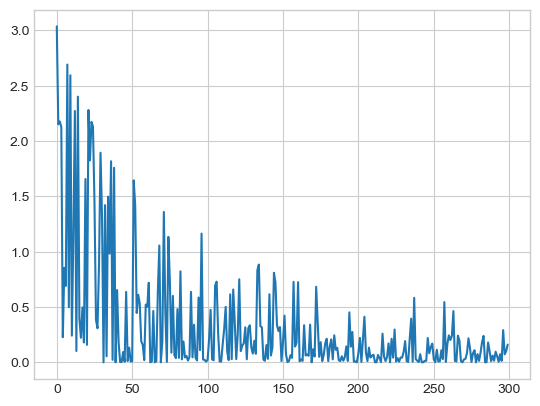

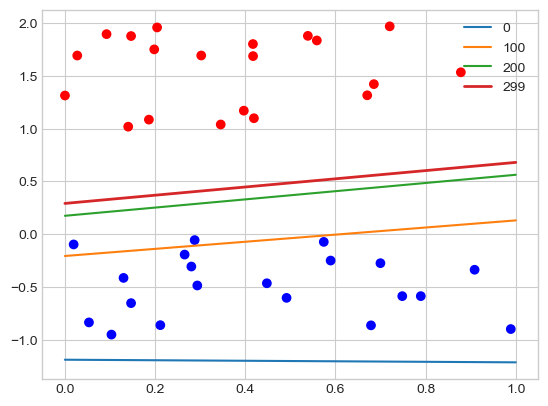

In [13]:
main()